In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import scipy.stats as stats

# Lecture 1 

- def of risk: 
- properties of distrecte RV
- CDF: $F_X(x) = P(X < x)$ General properties of CDF:
    - $\lim{x\to\infty} F_X(x) = 0$
    - $\lim{x\to-\infty} F_X(x) = 1$
    - $\forall x \le x' :\quad F_X(x) \le F_X(x')$

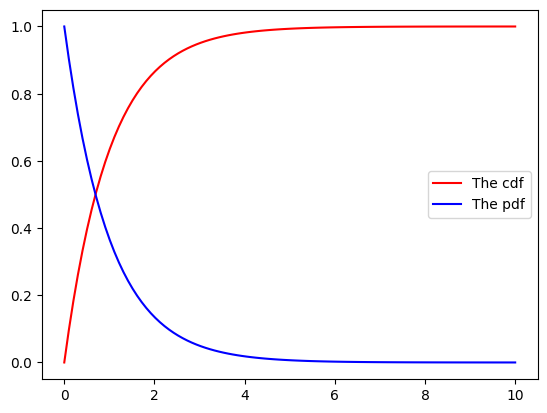

In [110]:
x = np.linspace(0, 10, 100)
expon_dist = stats.expon(scale = 1)
y = expon_dist.cdf(x)
y_1 = expon_dist.pdf(x)
plt.plot(x, y, color = 'r', label = 'The cdf')
plt.plot(x, y_1, color = 'b', label = 'The pdf')
plt.legend()
plt.show()

- Expectation
- Variance 
- SKewnwess
- Kurtosis

Distributions:
- poisson
- exponential
- gamma
- normal
- pareto

other topics:
- joint probabiliy
- conditional probability
- bayes theorm: $P(B \mid A) = \frac{P(A \cup B)}{P(A)}$

covariance and correlation

spearman correlation

multiple RV

Moment genarating function and Characteristic Function

# Lecture 2

## Stock returns

Def stock return over a period $k$: $R_t = \frac{S_t - S_{t-k}}{S_{t-k}}$

In [ ]:
import yfinance as yf 

ticker = "AAPL"
start="2020-01-01"
end="2025-01-01"
data = yf.download(
    ticker,
    start = start,
    end = end,
    interval="1d",  
    auto_adjust=True 
)

data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.468277,72.528597,71.223274,71.476615,135480400
2020-01-03,71.763725,72.523754,71.539337,71.696167,146322800
2020-01-06,72.335571,72.374177,70.634554,70.885487,118387200
2020-01-07,71.995361,72.600968,71.775796,72.345212,108872000
2020-01-08,73.153511,73.455110,71.698596,71.698596,132079200


mean: 0.0011821102766984774 std: 0.01994772310271604 min: -0.12864698758099502 max:0.11980806462302196


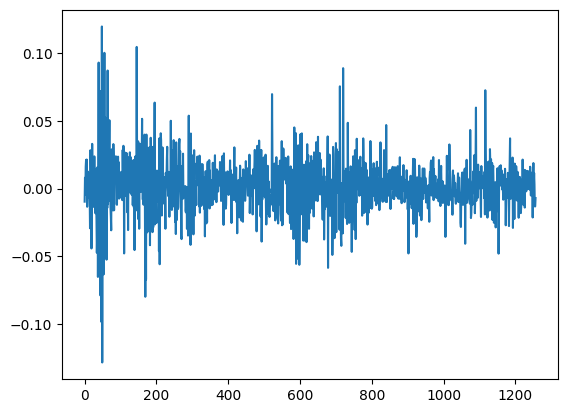

In [113]:
print(returns.shape)
print(type(returns))

(1257,)
<class 'numpy.ndarray'>


In [127]:
mu = returns.mean()
sigma = returns.std()
minimum = returns.min()
maximum = returns.max()

print(f'mean: {mu} \nstd: {sigma} \nmin: {minimum} \nmax:{maximum}')

mean: 0.0011821102766984774 
std: 0.01994772310271604 
min: -0.12864698758099502 
max:0.11980806462302196


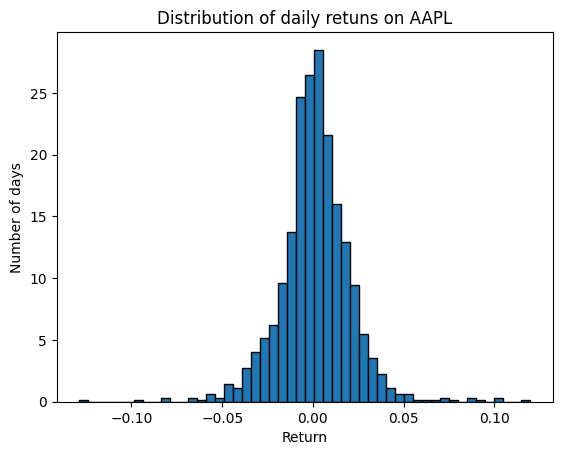

In [114]:
plt.hist(np_returns, density = True, bins = 50, edgecolor = 'black')
plt.title(f'Distribution of daily retuns on {ticker}')
plt.ylabel("Number of days")
plt.xlabel("Return")
plt.show()

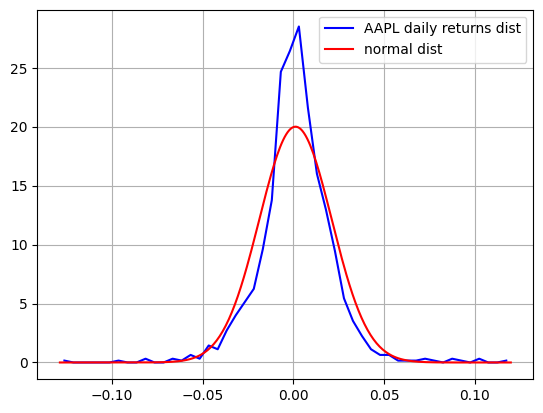

In [ ]:
# retuns dist
count, bins = np.histogram(returns, bins = 50, density = True)
centers = 0.5* (bins[1:] + bins[:-1])
plt.plot(centers, count, color = 'b', label= f'{ticker} daily returns dist')

# the norm dist
normal = stats.norm(mu, sigma)
x = np.linspace(minimum, maximum, 300)
normal_pdf = normal.pdf(x)

plt.plot(x, normal_pdf, label = 'normal dist', color = 'red')
plt.grid()
plt.legend()
plt.show()

## Power Law on log-log scale -  $y = c \times x^\alpha$

In estimating a power-law tail, the parameter $\alpha$ is obtained directly from the slope of a log–log plot.

When fitting a **PDF**, the tail behaves as
$f(x) \propto x^{-(\alpha+1)}$.
Therefore the slope on the log–log plot equals $-(\alpha+1)$, and:

$\alpha = \text{slope} - 1$

When fitting a **CCDF**, the tail behaves as
$\bar F(x) = P(X > x) \propto x^{-\alpha}$.
Therefore the slope on the log–log plot equals $-\alpha$, and:

$\alpha = -\text{slope}$

CDF : $P(X\le a) = F_X(a)$

CCDF : $P(a<X) = \overline{F}_X(a)$

Empircal CCDF : $CCDF(X_i) = 1 - \frac{i}{N}$ Where: $N =$ len of data

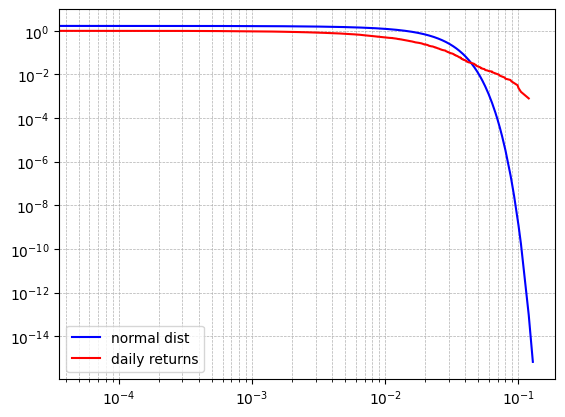

In [123]:
# Empiriccal CCDF
abs_r = np.sort(np.abs(returns))
n = len(abs_r)
emp_ccdf = np.ones(n) - np.arange(1, n+1) /n

#normal CCDF
norm_ccdf = 2 * (1 - stats.norm.cdf(abs_r, abs_r.mean(), abs_r.std()))

# log-log plot 
plt.loglog(abs_r, norm_ccdf, color = 'b', label = 'normal dist')
plt.loglog(abs_r[:-1], emp_ccdf[:-1], color = 'r', label = 'daily returns')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [117]:
# Transform the data to log scale
log_x = np.log(abs_r[:-1])
log_y = np.log(emp_ccdf[:-1])

# pick only the tail the 5% of values exlude last elemnt
ntail = log_x[round(n*0.95):] 
vtail = log_y[round(n*0.95):] # The last element: = 1-n/n = 0 
                                 # and log(0) = -inf then the linear regresion wont work

# linear regression to find the slope
result = stats.linregress(ntail,vtail)

print(result.slope)

-3.0096880985785983


/var/folders/jt/w85x3rfd3cq6h1wyk8v8r3sm0000gn/T/ipykernel_77775/974543037.py:2: RuntimeWarning: divide by zero encountered in log
  log_x = np.log(abs_r[:-1])


> Link to linearegress function : https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

**The function returns object with the following attributes:**
- slope

- intercept

- rvalue: The Pearson correlation coefficient. The square of rvalue is equal to the coefficient of determination.

- pvalue: The p-value for a hypothesis test whose null hypothesis is that the slope is zero, using Wald Test with t-distribution of the test statistic. See alternative above for alternative hypotheses.

- stderr: Standard error of the estimated slope (gradient), under the assumption of residual normality.

- intercept_stderr: Standard error of the estimated intercept, under the assumption of residual normality.

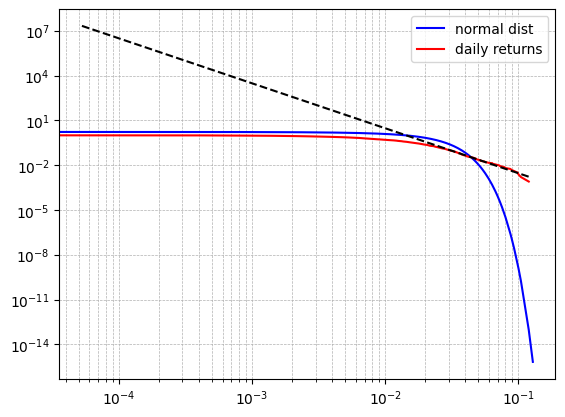

In [122]:
fit_y = result.slope*log_x + result.intercept

# log-log plot 
plt.loglog(abs_r, norm_ccdf, color = 'b', label = 'normal dist')
plt.loglog(abs_r[:-1], emp_ccdf[:-1], color = 'r', label = 'daily returns')
plt.loglog(np.exp(log_x), np.exp(fit_y), linestyle = '--', color = "black")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()